In [3]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display

Step-1 : Read CSV data into a dataframe

In [5]:
data = "https://trello.com/1/cards/6438c561324b51d6acb221e1/attachments/643ff55dd651987ffe1ad119/download/StockDataBANKBARODA_1.csv"
df = pd.read_csv(data)
print(df)

      Unnamed: 0                      Date    Open    High     Low   Close  \
0              0  2023-03-06T09:15:00+0530  173.55  174.45  173.15  174.35   
1              1  2023-03-06T09:20:00+0530  174.30  174.50  173.70  174.30   
2              2  2023-03-06T09:25:00+0530  174.30  174.45  173.55  174.45   
3              3  2023-03-06T09:30:00+0530  174.45  174.90  174.25  174.80   
4              4  2023-03-06T09:35:00+0530  174.80  175.20  174.50  175.05   
...          ...                       ...     ...     ...     ...     ...   
1721        1721  2023-04-11T15:10:00+0530  170.70  171.00  170.60  171.00   
1722        1722  2023-04-11T15:15:00+0530  171.00  171.30  170.75  170.90   
1723        1723  2023-04-11T15:20:00+0530  170.85  171.05  170.65  170.90   
1724        1724  2023-04-11T15:25:00+0530  170.85  171.05  170.75  170.75   
1725        1725  2023-04-11T15:30:00+0530  170.80  170.80  170.80  170.80   

      Volume  
0     997805  
1     750498  
2     483941  
3  

Step-2: Cleaning and Preprocessing of data

In [6]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-03-06T09:15:00+0530,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06T09:20:00+0530,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06T09:25:00+0530,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06T09:30:00+0530,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06T09:35:00+0530,174.80,175.20,174.50,175.05,874142


In [7]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1721,1721,2023-04-11T15:10:00+0530,170.70,171.00,170.60,171.00,557529
1722,1722,2023-04-11T15:15:00+0530,171.00,171.30,170.75,170.90,888538
1723,1723,2023-04-11T15:20:00+0530,170.85,171.05,170.65,170.90,762107
1724,1724,2023-04-11T15:25:00+0530,170.85,171.05,170.75,170.75,343612
1725,1725,2023-04-11T15:30:00+0530,170.80,170.80,170.80,170.80,3571


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1726 non-null   int64  
 1   Date        1726 non-null   object 
 2   Open        1726 non-null   float64
 3   High        1726 non-null   float64
 4   Low         1726 non-null   float64
 5   Close       1726 non-null   float64
 6   Volume      1726 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 94.5+ KB


In [9]:
df.isnull()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1721,False,False,False,False,False,False,False
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False


In [10]:
#Let's assume the CSV contains columns: "Date", "Open", "High", "Low", "Close"
#Hence converting "Date" column to datetime

df['Date'] = pd.to_datetime(df['Date'])

Step-3: Plot candlestick chart

In [11]:
#Convert date to mdates format
df['Date'] = df['Date'].apply(mdates.date2num)
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']]
print(ohlc)

              Date    Open    High     Low   Close
0     19422.156250  173.55  174.45  173.15  174.35
1     19422.159722  174.30  174.50  173.70  174.30
2     19422.163194  174.30  174.45  173.55  174.45
3     19422.166667  174.45  174.90  174.25  174.80
4     19422.170139  174.80  175.20  174.50  175.05
...            ...     ...     ...     ...     ...
1721  19458.402778  170.70  171.00  170.60  171.00
1722  19458.406250  171.00  171.30  170.75  170.90
1723  19458.409722  170.85  171.05  170.65  170.90
1724  19458.413194  170.85  171.05  170.75  170.75
1725  19458.416667  170.80  170.80  170.80  170.80

[1726 rows x 5 columns]


In [12]:
#Function to update candlestick chart based on slider value
def chart_update(candlestick_width):
  plt.figure(figsize=(12,6))
  ax = plt.subplot()
  ax.xaxis_date()
  candlestick_ohlc(ax, ohlc.values, width=candlestick_width, colorup="b", colordown="r")
  plt.title('BANK of BARODA - Candlestick Chart')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.xticks(rotation=45)
  plt.show()

In [13]:
# Create slider widget for candlestick width adjustment
candlestick_slider = widgets.FloatSlider(min= 0.1, max=1.0, step=0.1, value=0.6, description='Candlestick Width')


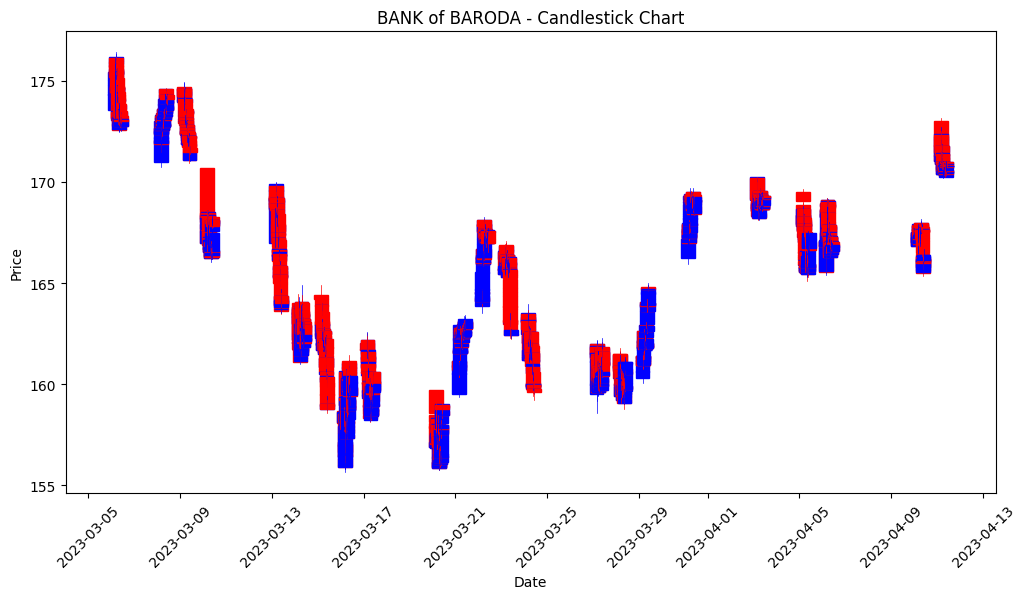

In [14]:
#Display the initial chartwith default candlestick width
chart_update(candlestick_slider.value)

In [15]:
widgets.interactive(chart_update, candlestick_width = candlestick_slider)

interactive(children=(FloatSlider(value=0.6, description='Candlestick Width', max=1.0, min=0.1), Output()), _d…